In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [5]:
DIRECTORY = './data/'
train = pd.read_csv(DIRECTORY + 'train.csv', parse_dates=['date'])
test = pd.read_csv(DIRECTORY + 'test.csv', parse_dates=['date'])

In [7]:
print("Train date range:", train['date'].min(), train['date'].max())
print("Test date range:", test['date'].min(), test['date'].max())

Train date range: 2010-01-01 00:00:00 2016-12-31 00:00:00
Test date range: 2017-01-01 00:00:00 2019-12-31 00:00:00


In [9]:
print("Train days:", len(train['date'].unique()))
print("Expected train days:", len(pd.date_range(train['date'].min(), train['date'].max())))
print("Test days:", len(test['date'].unique()))
print("Expected train days:", len(pd.date_range(test['date'].min(), test['date'].max())))

Train days: 2557
Expected train days: 2557
Test days: 1095
Expected train days: 1095


In [13]:
display(train['store'].value_counts())
display(train['product'].value_counts())
display(train['num_sold'].describe())

store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64

count    221259.000000
mean        752.527382
std         690.165445
min           5.000000
25%         219.000000
50%         605.000000
75%        1114.000000
max        5939.000000
Name: num_sold, dtype: float64

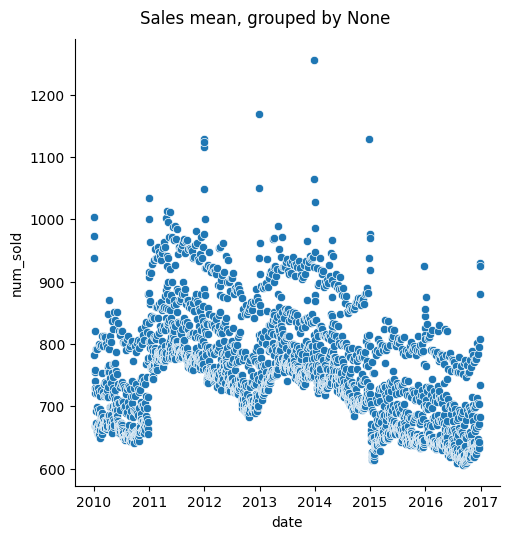

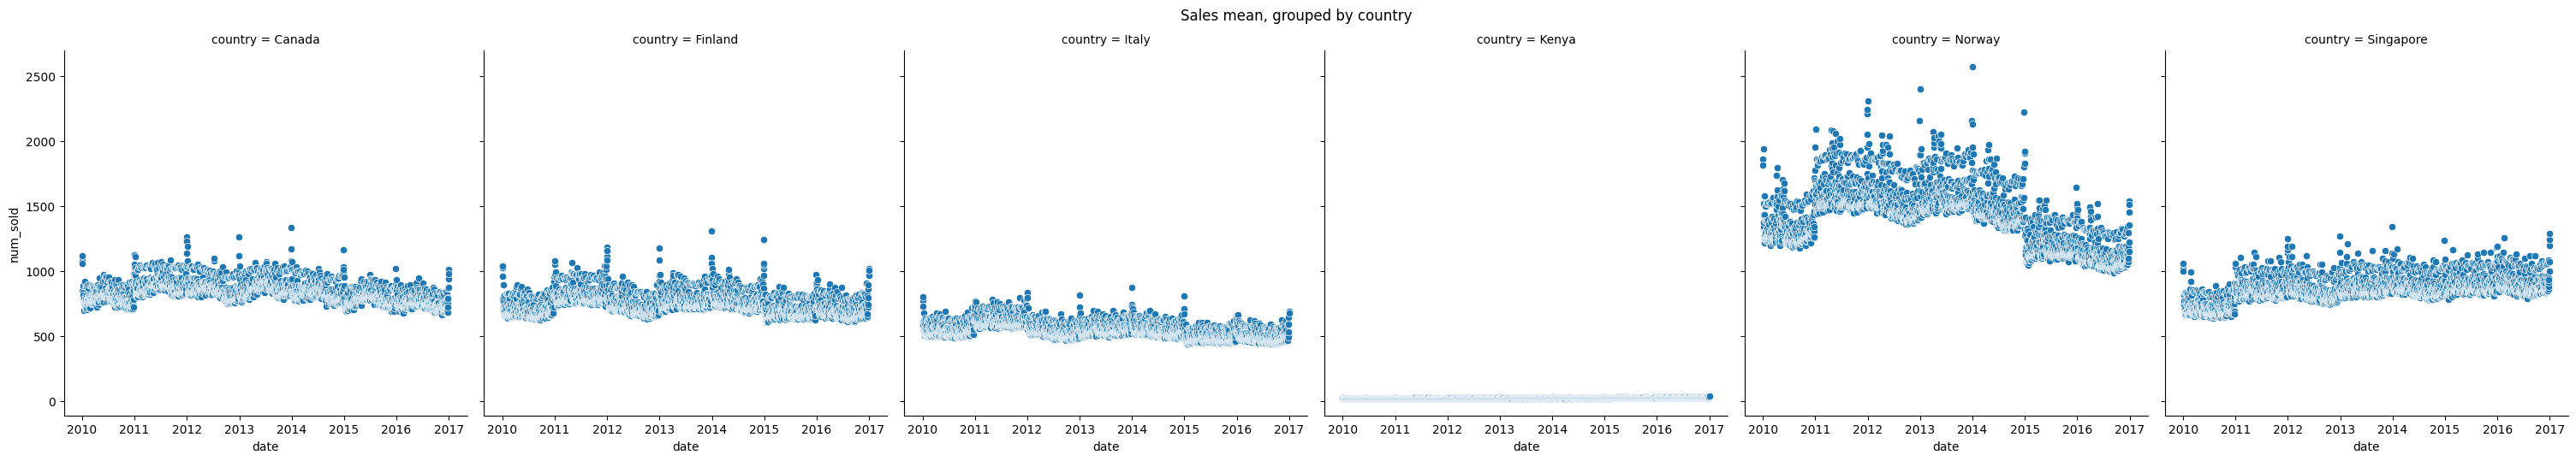

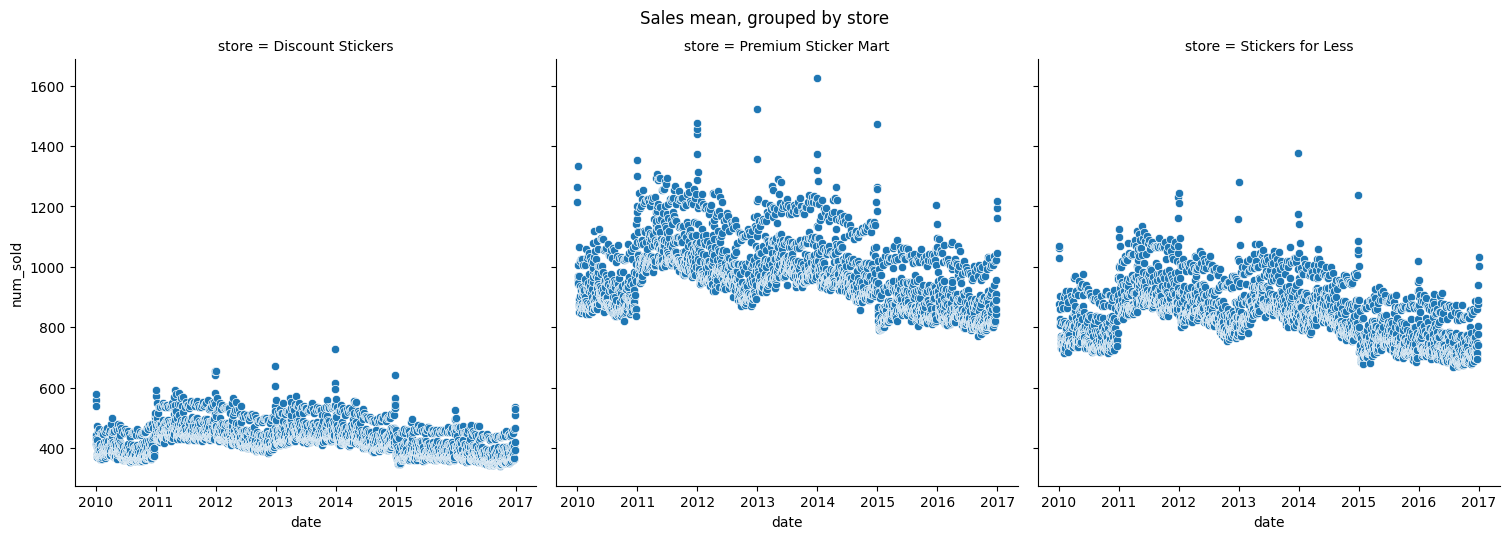

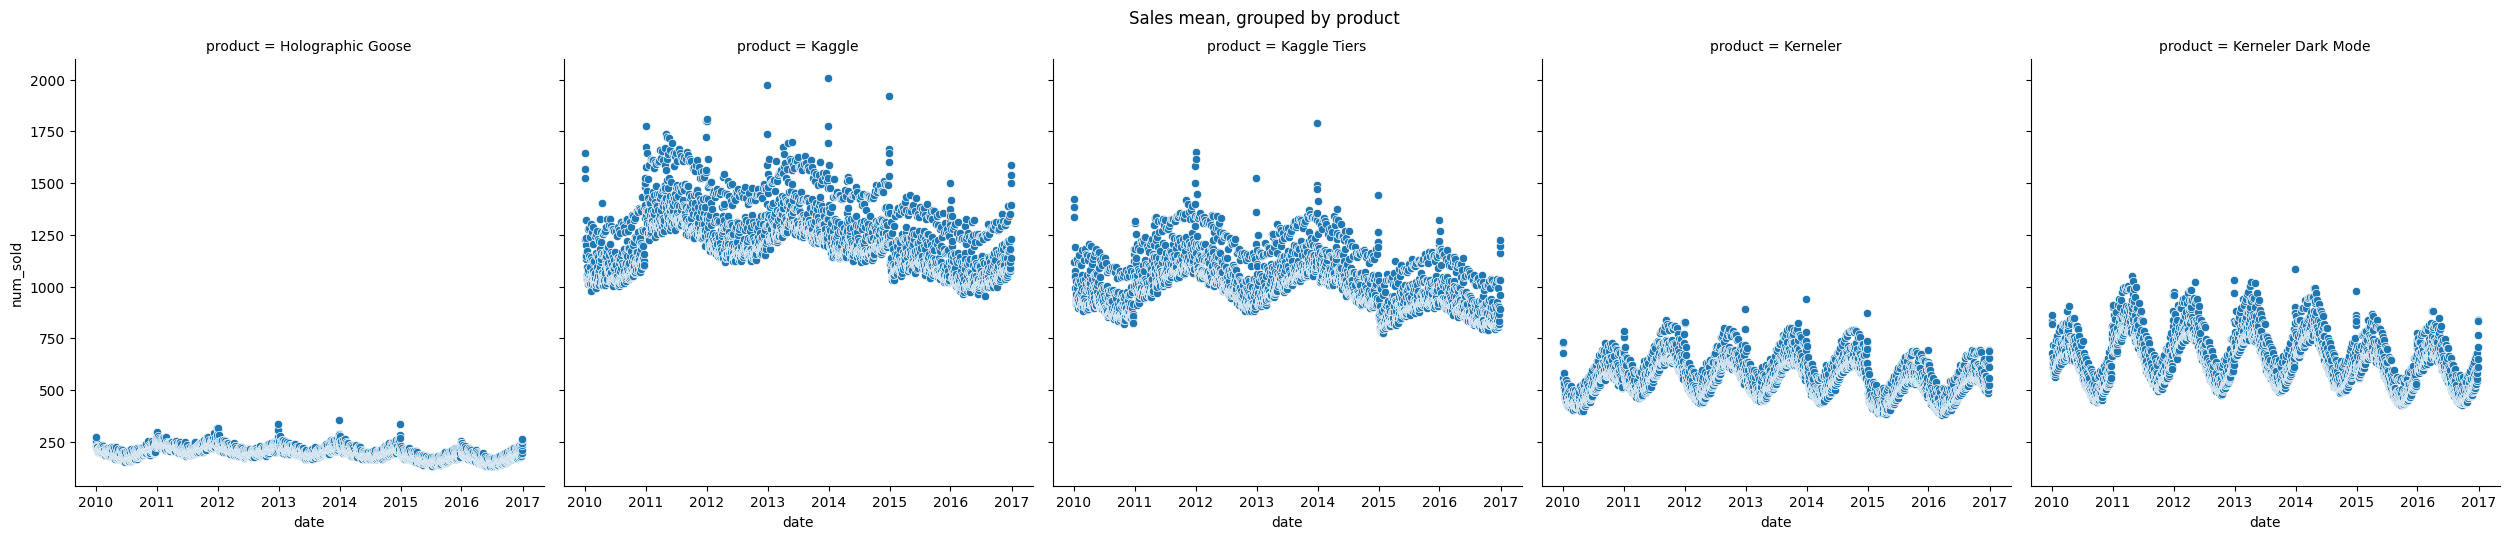

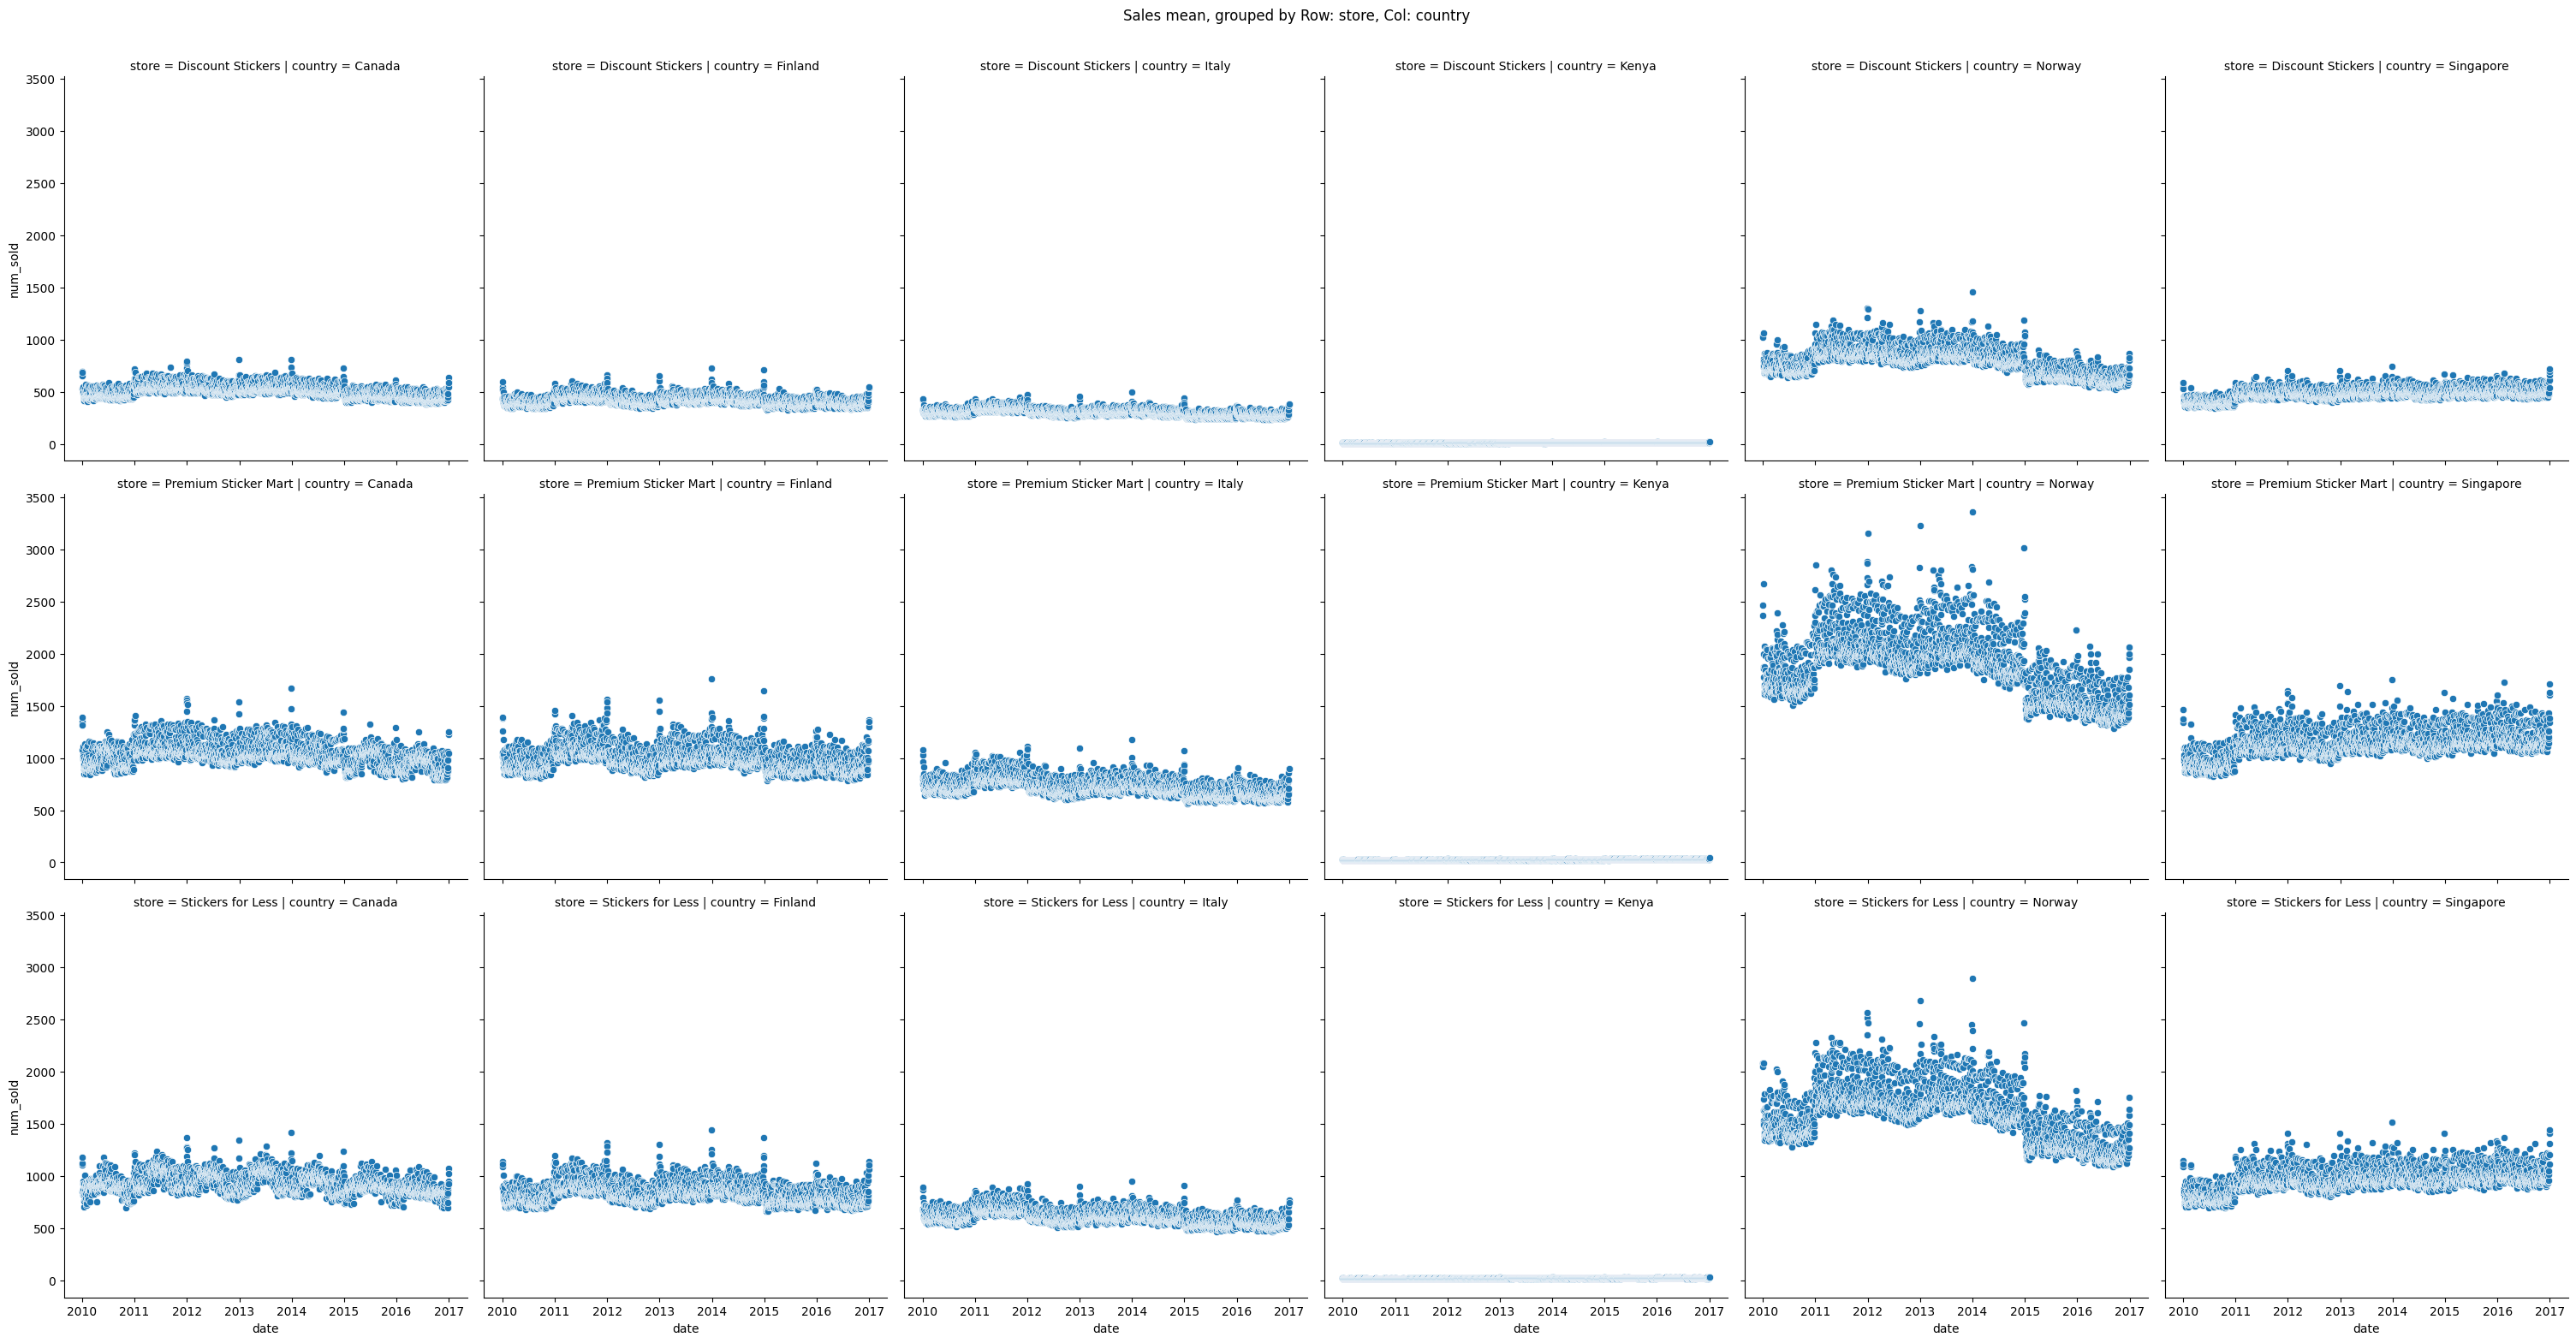

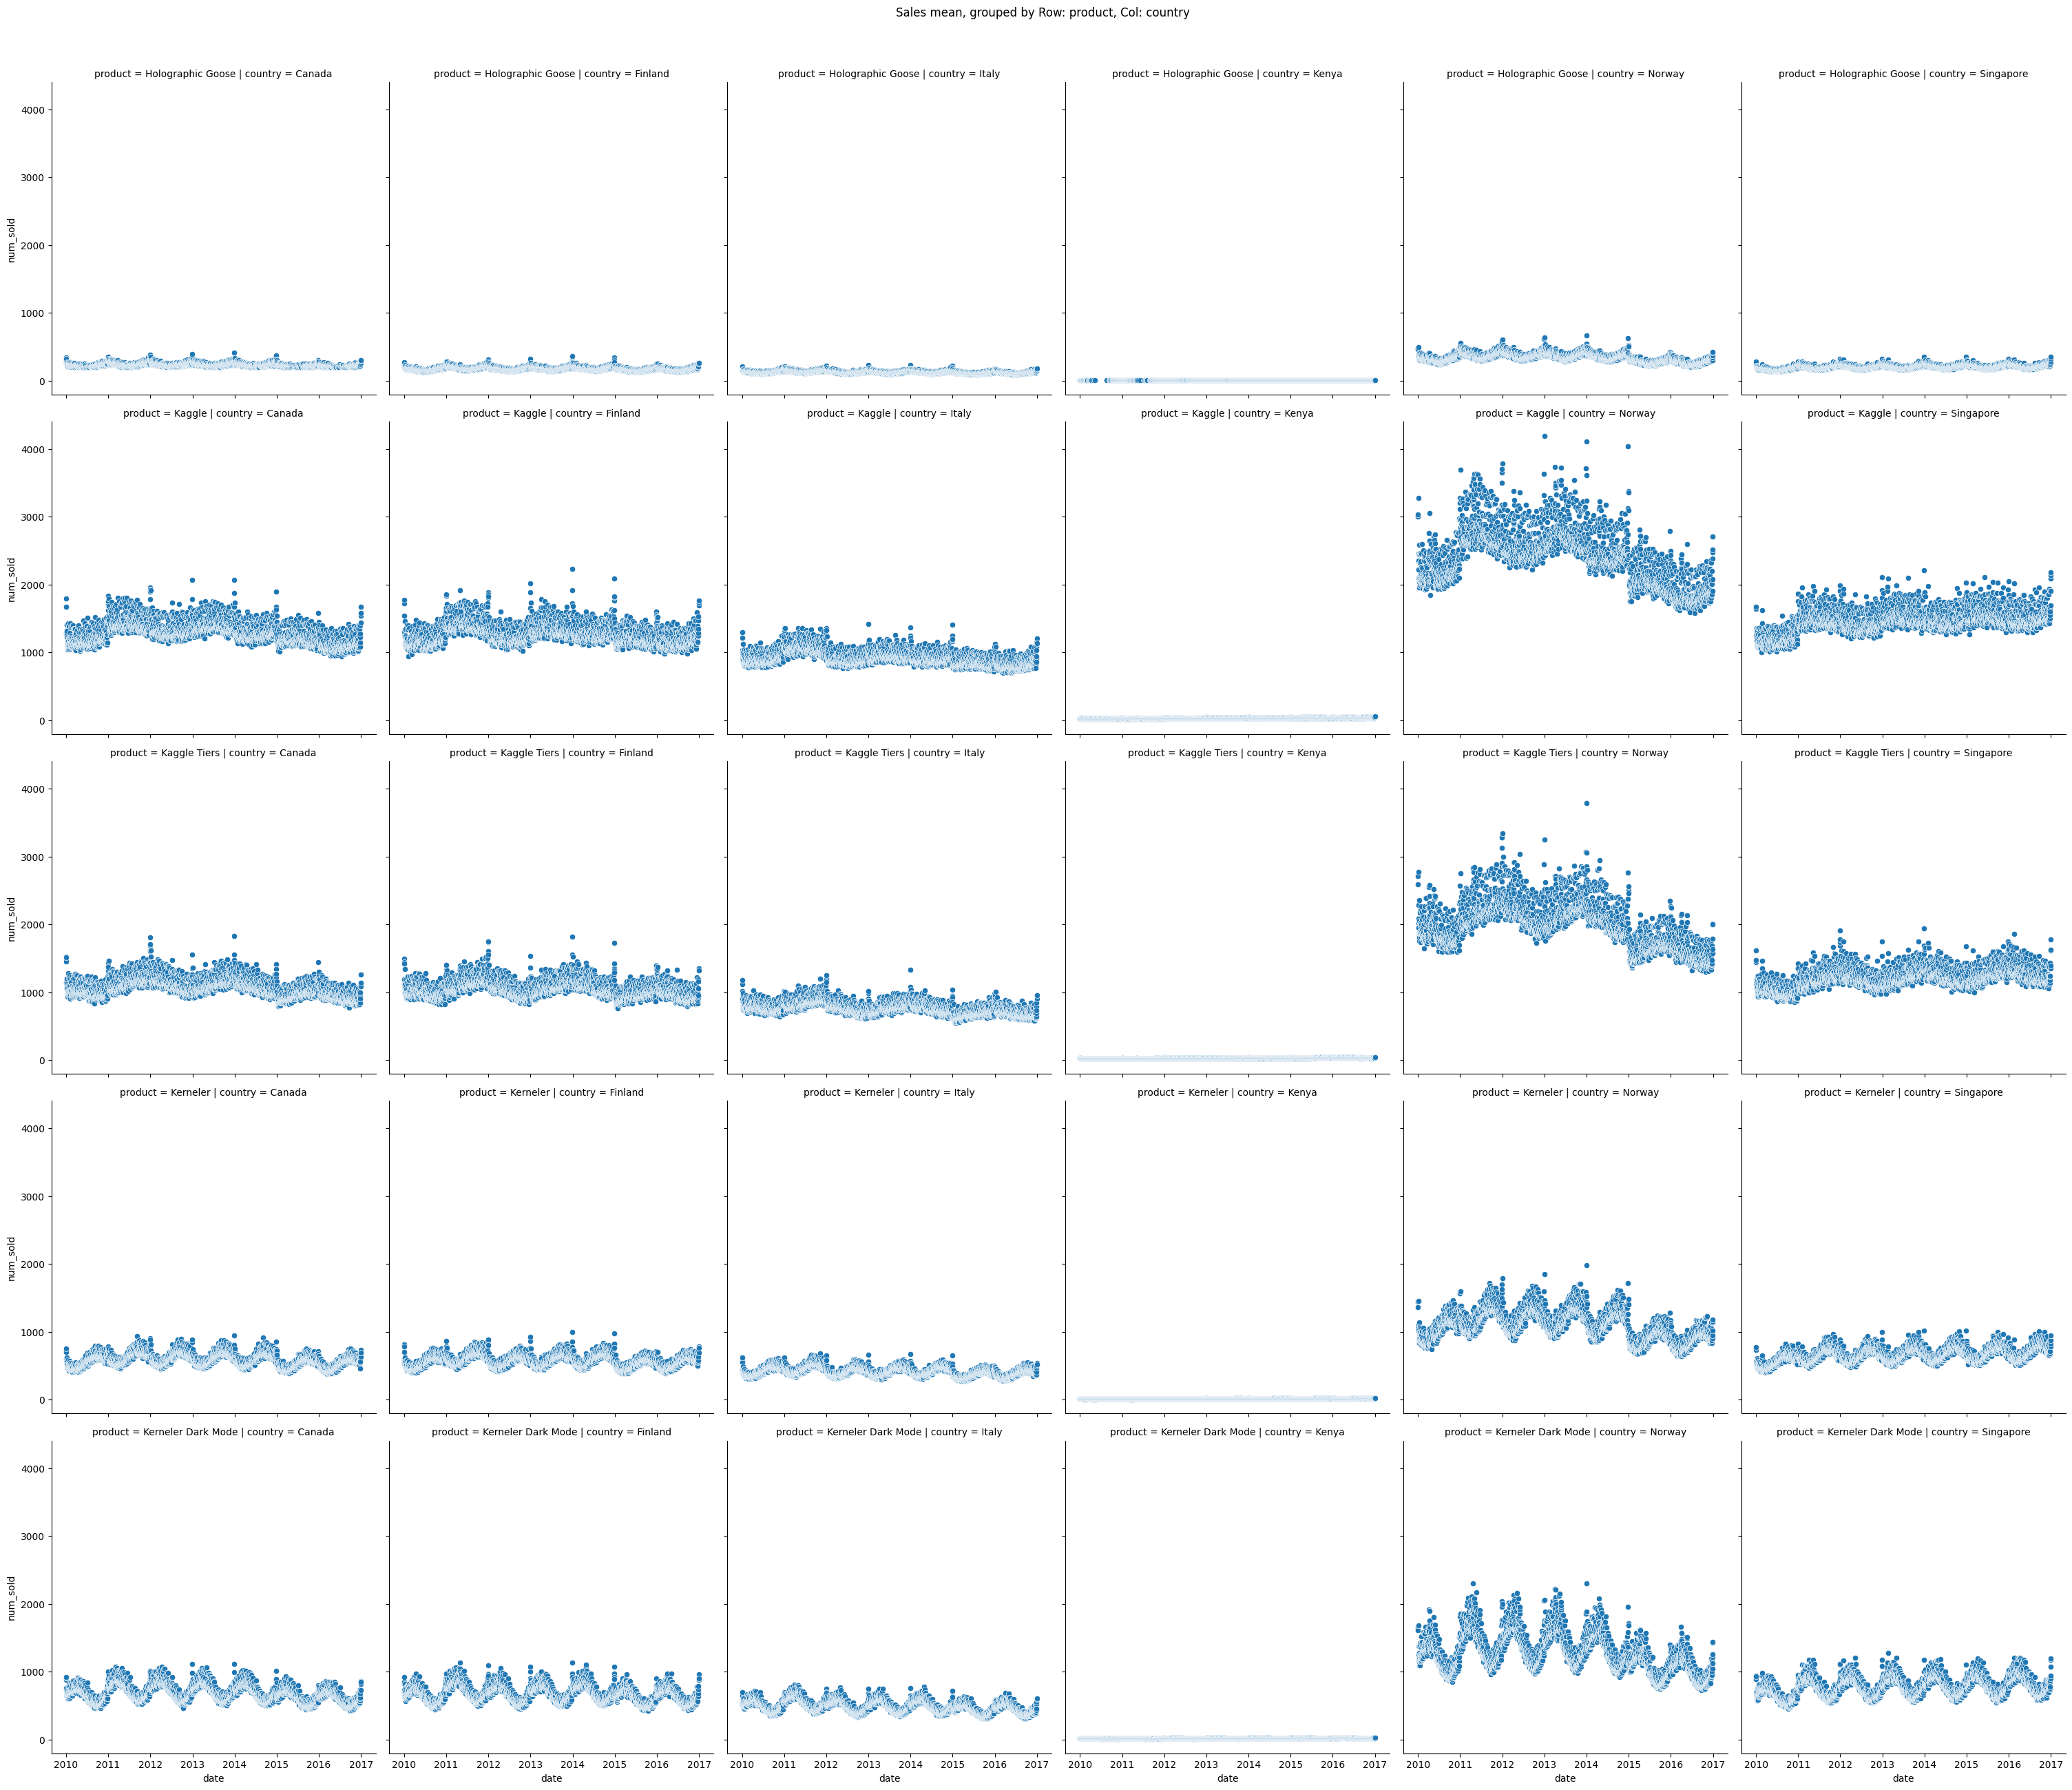

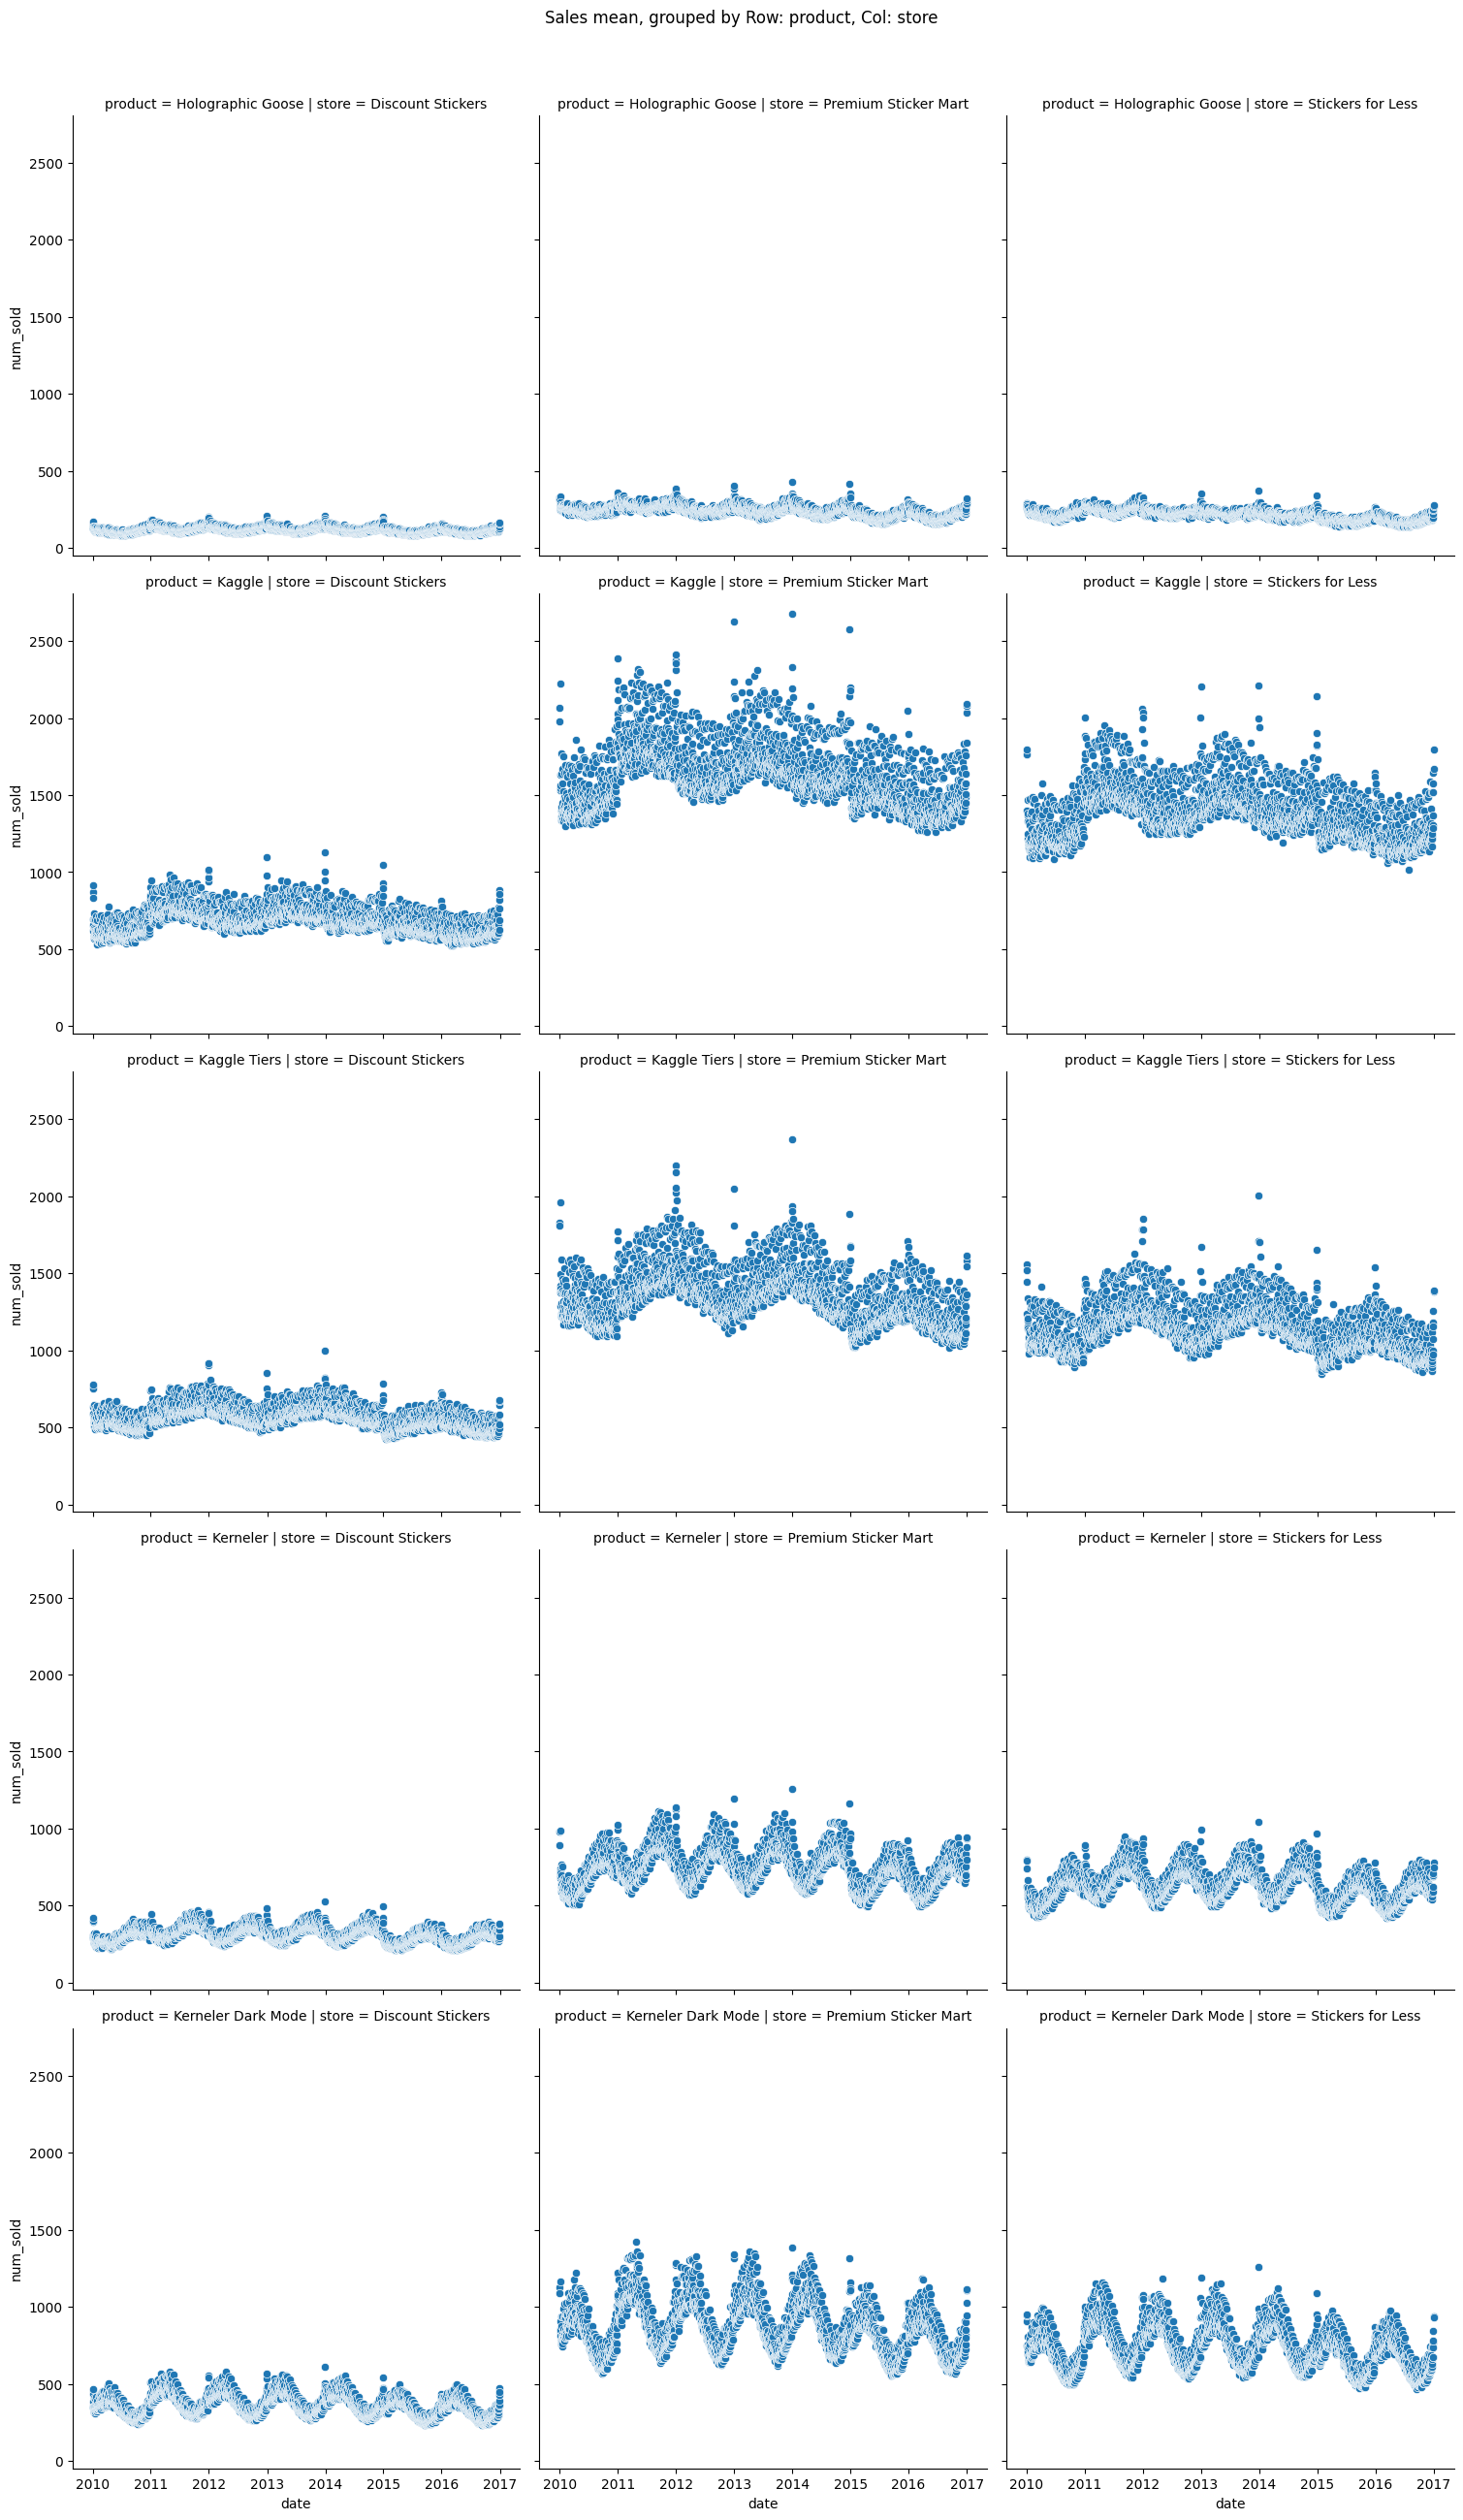

In [34]:
def graph_grouping(df: pd.DataFrame, grouping):
    grouped = df.groupby(grouping + ['date'])['num_sold'].mean().reset_index()

    col_group = grouping[0] if len(grouping) >= 1 else None
    row_group = grouping[1] if len(grouping) >= 2 else None
    g = sns.relplot(data=grouped, x='date', y='num_sold', col=col_group, row=row_group)

    title = 'None'
    if len(grouping) == 1: title=col_group
    if len(grouping) == 2: title=f'Row: {row_group}, Col: {col_group}'
    g.fig.suptitle(f'Sales mean, grouped by {title}', y=1.03)
    plt.show()

categories = ['country', 'store', 'product']
subsets = []
for r in range(len(categories)):  # Iterate over all possible sizes of subsets (0 to len(items))
    subsets.extend([list(combo) for combo in itertools.combinations(categories, r)])

for subset in subsets:
    graph_grouping(train, subset)